In [1]:
import numpy as np
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as PLT
import seaborn as SB

# <font color="orange">Continuous Distributions</font>
  * normal
  * uniform
  * exponential

<AxesSubplot:>

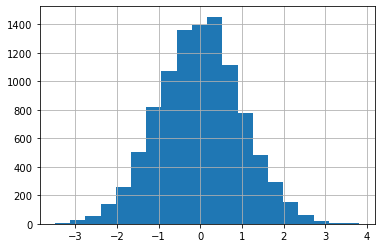

In [2]:
DT_norm = stats.norm.rvs(size=10000, loc=0, scale=1)
pd.Series(DT_norm).hist(bins=20)

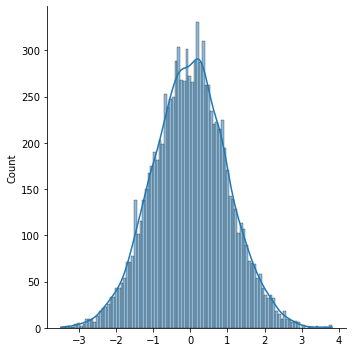

In [3]:
SB.displot(DT_norm, bins=100, kde=True)

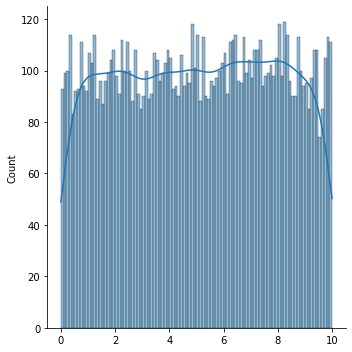

In [4]:
DT_uniform = stats.uniform.rvs(size=10000, loc=0, scale=10)
SB.displot(DT_uniform, kde=True, bins=100)

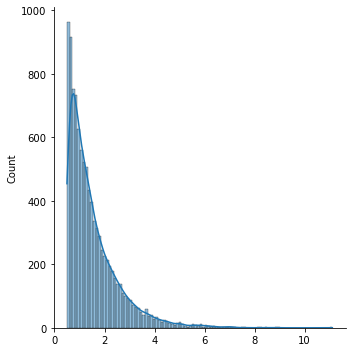

In [5]:
DT_exponential = stats.expon.rvs(1/2,size=10000) # mean call time 2 mintue
SB.displot(DT_exponential, kde=True)

# <font color="orange">Discrete Distributions</font>
  * bernoli
  * binomial
  * multinomial
  * poisson

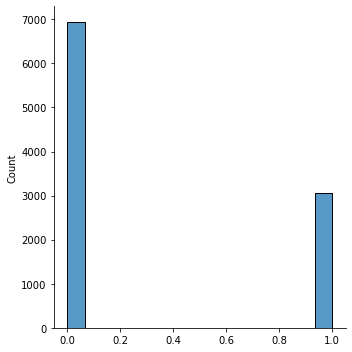

In [6]:
DT_bernoli = stats.bernoulli.rvs(size=10000, p=.3)
SB.displot(DT_bernoli)

array([29, 36, 36, ..., 26, 34, 26])

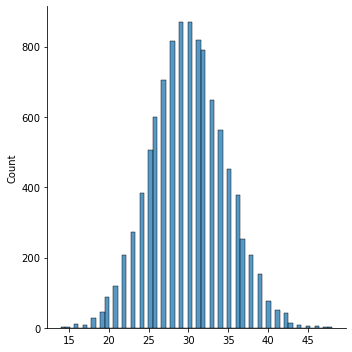

In [7]:
DT_binomial = stats.binom.rvs(size=10000, p=.3, n=100)
SB.displot(DT_binomial)
DT_binomial

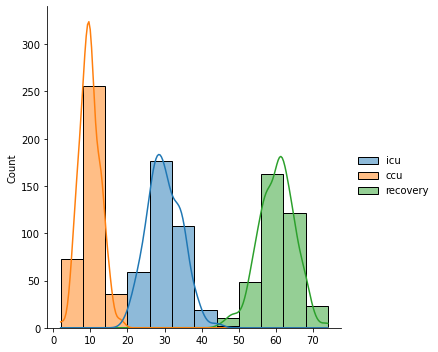

In [8]:
icu = 0.3
ccu = 0.1
recovery = 0.6
DT_multinomial = stats.multinomial.rvs(100, [icu,ccu,recovery], size=365)
DT_multinomial = pd.DataFrame(DT_multinomial, columns=['icu','ccu','recovery'])

SB.displot(DT_multinomial, kde=True)

[ 7  6  8  5 10  2  2  7  6  5  9  7 12  6 10  3  8  5  4  0  8 10  7  6
  6  6  9  7 14  7  8 11 12 10  9 10 10  7  4  6  1  2  9  6  4  0  9  6
 12  8  4  6  8  5  6 10  4  7  4  8  6  7 11  9  8  6  5 12 11  7  8  6
  5  6  8  5  6 10  6  2  5  7  4  4  6  6 10  7  9  6  5  4  5 10  4  1
  6  4  6 10  9 11  7  5  8  3  7  8 10  8 10  5 10 13  7  4 11  2  6  9
  6 10  4  6  9  7  7  6  5  6  6  6 14  7  7  7  7 10  7  1  6  7  5 12
 10 10 11  8  5  8  5  5  7  7  8  4  5  8 12 11  4  8 10  5  4  6  9  6
  6  8  8  5  6  8  8  9  7  5  9  2 11  9  5  6  9  3  8  8  3  8  7  7
  9  9  9  6  7  5  9  6 12  8  9  6  9  3 12  9  8  6  5  9  7  7  6 11
  3  6  9 10 11  5  6  8  3  7  7  7 11 11  4 13 11  6  4  4  6  3  8  3
  9  9  7  6  6  4  7  5  3  3  4  8  8  6  5  8  7  5  5  5  3  8 14  3
  5  8  5  7  5 10  7  8  6 12 11  5 18  8  5  6  5  8  4  6  8  1  9  7
  9  8  6  8  4  8  7  5  5  5 11  7  9  5  3 10  8  3  8  2  9  7 13  9
  7 11 11  8  5  1  1  2  7  5  6  4  6 12  7  5  9

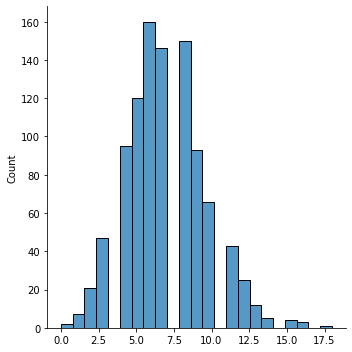

In [9]:
DT_poisson = stats.poisson.rvs(mu=7, size=1000)
print(DT_poisson)

SB.displot(DT_poisson)

# <font color="orange">PDF(Continuous) - PMF(discrete) - CDF</font>

In [10]:
DT_binomial = stats.binom(5000,.2)
TAKHT = 400
pmfsum = 0
# for i in range(1000, 5000):
#     pmfsum+= DT_binomial.pmf(i)
# print(pmfsum)
DT_binomial.cdf(5000) - DT_binomial.cdf(1000) 

0.49153823516345097

In [11]:
DT_poisson = stats.poisson(160) #160 moshtari dar rooz
1 - DT_poisson.cdf(150) # ehtemal 200 moshtari be bala da rooz

0.7719677058307436

# <font color="orange">Comparison Distributions</font>
 * Kullback Divergence (KL)
 * Jenson Shanon(JS)
 * Kolmogorov Smirnov (KS)
 

In [12]:
def KL_divergence(p,q):
    return np.sum(
        np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
    )

0.017495674168934057

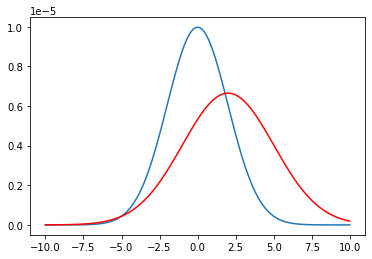

In [28]:
DT_X = np.arange(-10,10,0.001)
p = stats.norm.pdf(DT_X,0,2) / len(DT_X)
q = stats.norm.pdf(DT_X,2,3)/ len(DT_X)

PLT.plot(DT_X,p)
PLT.plot(DT_X,q, c='red')
KL_divergence(p,q)

### <font color="Brown">Kullback Divergence (KL)</font>

In [14]:
WH = pd.read_csv('../datasets/weight-height.csv')
WH.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,   2.,   3.,   1.,
          5.,   5.,   4.,   6.,   5.,   8.,   9.,   9.,  12.,  14.,   9.,
         16.,  16.,  19.,  29.,  34.,  27.,  20.,  37.,  47.,  56.,  60.,
         63.,  59.,  70.,  77.,  78.,  88.,  89.,  96., 101., 125., 131.,
        127., 129., 148., 148., 150., 135., 122., 168., 145., 139., 151.,
        134., 124., 112., 144.,  93., 133., 109.,  98., 115., 113., 103.,
         83.,  79.,  62.,  61.,  46.,  50.,  40.,  43.,  42.,  34.,  28.,
         30.,  16.,  20.,  13.,  11.,   8.,  11.,   5.,   8.,   4.,   7.,
          8.,   4.,   3.,   1.,   3.,   0.,   0.,   1.,   0.,   2.,   1.,
          1.]),
 array([58.40690493, 58.61282331, 58.81874168, 59.02466005, 59.23057843,
        59.4364968 , 59.64241518, 59.84833355, 60.05425192, 60.2601703 ,
        60.46608867, 60.67200705, 60.87792542, 61.0838438 , 61.28976217,
        61.49568054, 61.70159892, 61.90751729, 62.11343567, 62.31935404,
        62.52527241, 62.73

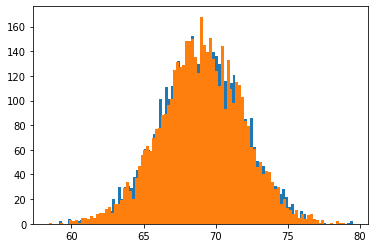

In [69]:
MH = WH[WH['Gender']=='Male']['Height']
FMH = WH[WH['Gender']=='Female']['Height']

NMH = stats.norm.rvs(size=len(MH), loc=MH.mean(), scale=MH.std())
PLT.hist(NMH,bins=100)
PLT.hist(MH,bins=100)

In [79]:
MHcount, _ = np.histogram(MH,bins=100)
FMHcount, _ = np.histogram(FMH,bins=100)
NMHcount, _ = np.histogram(NMH,bins=100)
KL_divergence(MHcount/len(MH),NMHcount/len(MH))

/tmp/ipykernel_1046/2900689964.py:3: RuntimeWarning: divide by zero encountered in true_divide
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
/tmp/ipykernel_1046/2900689964.py:3: RuntimeWarning: invalid value encountered in true_divide
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
/tmp/ipykernel_1046/2900689964.py:3: RuntimeWarning: divide by zero encountered in log
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
/tmp/ipykernel_1046/2900689964.py:3: RuntimeWarning: invalid value encountered in multiply
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )


0.04275693457512958

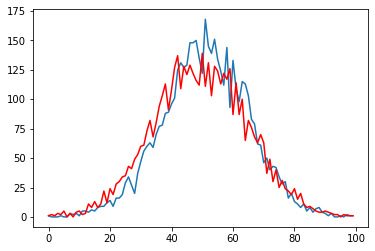

In [34]:
PLT.plot(MHcount)
PLT.plot(NMHcount,c='red')

### <font color="Brown">Jenson Shanon(JS): 0~ JS ~1 sensitive to bins</font>

In [36]:
def Jenson_shanon(p,q):
    p = p / np.linalg.norm(p, ord=1)
    q = q / np.linalg.norm(q, ord=1)
    m = .5 * (p + q)
    return  .5 * ( stats.entropy(p,m) + stats.entropy(q,m) )

In [40]:
Jenson_shanon(MHcount,NMHcount) # MH is a normal distribution

0.010071207066443178

In [41]:
WINSPEED = pd.read_csv('../datasets/wind_speed_laurel_nebraska.csv')
WINSPEED.head()

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


In [45]:
NWINSPEED_AVG = stats.norm.rvs(size=len(WINSPEED['10 Min Sampled Avg']), loc=WINSPEED['10 Min Sampled Avg'].mean(), scale=WINSPEED['10 Min Sampled Avg'].std() )
WINSPEED_AVG_count, _ = np.histogram(WINSPEED['10 Min Sampled Avg'], bins=100)
NWINSPEED_AVG_count, _ = np.histogram(NWINSPEED_AVG, bins=100)

In [46]:
Jenson_shanon(WINSPEED_AVG_count,NWINSPEED_AVG_count)

0.18520181168737665

(array([ 7.,  7.,  7., 12.,  8., 23., 21., 11., 25., 22., 22., 11., 18.,
         5.,  8.,  1.,  8.,  3.,  1.,  1.]),
 array([ 8.46009346,  9.83683062, 11.21356778, 12.59030494, 13.96704211,
        15.34377927, 16.72051643, 18.09725359, 19.47399076, 20.85072792,
        22.22746508, 23.60420224, 24.98093941, 26.35767657, 27.73441373,
        29.1111509 , 30.48788806, 31.86462522, 33.24136238, 34.61809955,
        35.99483671]),
 <BarContainer object of 20 artists>)

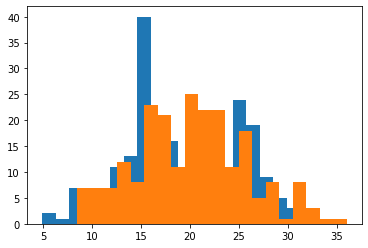

In [52]:
PLT.hist(WINSPEED['10 Min Sampled Avg'], bins=20)
PLT.hist(NWINSPEED_AVG, bins=20)

### <font color="Brown">Kolmogorov Smirnov (KS)</font>
 * H0 : two distribution is same
 * if p-value under 0.05 reject H0

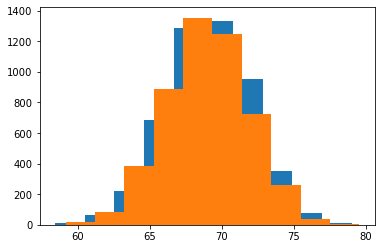

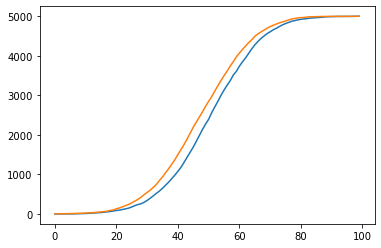

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

In [100]:
PLT.hist(MH)
PLT.hist(NMH)
PLT.show()

PLT.plot(np.cumsum(MHcount))
PLT.plot(np.cumsum(NMHcount))
PLT.show()

stats.kstest(MHcount, NMHcount)

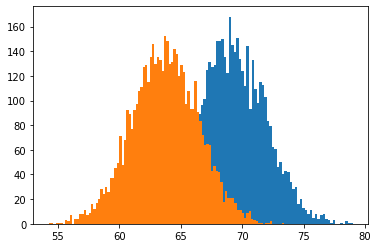

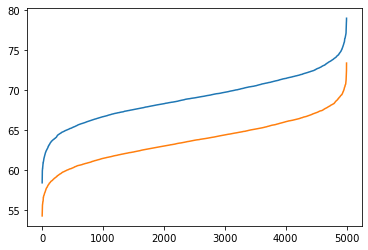

KstestResult(statistic=0.6664, pvalue=0.0)

In [139]:
PLT.hist(MH.sort_values().reset_index(drop=True),bins=100)
PLT.hist(FMH.sort_values().reset_index(drop=True),bins=100)
PLT.show()

PLT.plot(MH.sort_values().reset_index(drop=True))
PLT.plot(FMH.sort_values().reset_index(drop=True))
PLT.show()

stats.kstest(MH, FMH)

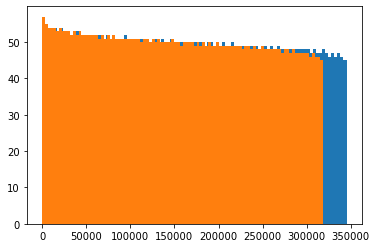

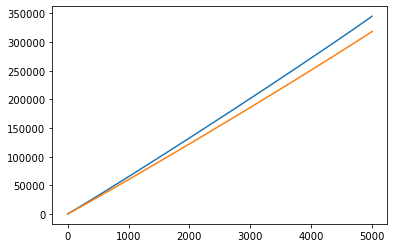

In [125]:
PLT.hist(np.cumsum(MH.sort_values().reset_index(drop=True)),bins=100)
PLT.hist(np.cumsum(FMH.sort_values().reset_index(drop=True)),bins=100)
PLT.show()

PLT.plot(np.cumsum(MH.sort_values().reset_index(drop=True)))
PLT.plot(np.cumsum(FMH.sort_values().reset_index(drop=True)))
PLT.show()

In [134]:
stats.kstest(np.cumsum(MHcount), np.cumsum(FMHcount), N=1000)

KstestResult(statistic=0.04, pvalue=0.999998821968263)

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-9.44564028, -9.25437575, -9.06311123, -8.8718467 , -8.68058218,
        -8.48931765, -8.29805313, -8.1067886 , -7.91552408, -7.72425955,
        -7.53299502, -7.3417305 , -7.15046597, -6.95920145, -6.76793692,
        -6.5766724 , -6.38540787, -6.19414335, -6.00287882, -5.8116143 ,
        -5.62034977, -5.42

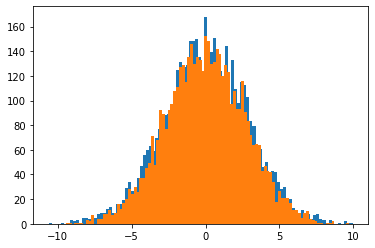

In [138]:
# zero center
PLT.hist(MH-MH.mean(),bins=100)
PLT.hist(FMH-FMH.mean(),bins=100)

In [144]:
stats.kstest(MH-MH.mean(), FMH-FMH.mean())

KstestResult(statistic=0.0194, pvalue=0.3035775745288207)

In [150]:
stats.kstest(MH-MH.mean(),'norm')

KstestResult(statistic=0.23808525858975527, pvalue=7.336270444149125e-250)

In [153]:
stats.kstest(MH,NMH)

KstestResult(statistic=0.0114, pvalue=0.901388591127366)